In [5]:
%matplotlib inline
from pylab import *
from sci378 import Storage
from pyndamics3 import Simulation

$$
\frac{dx}{dt}= v 
$$

$$
\frac{dv}{dt}= -k\cdot x/m
$$

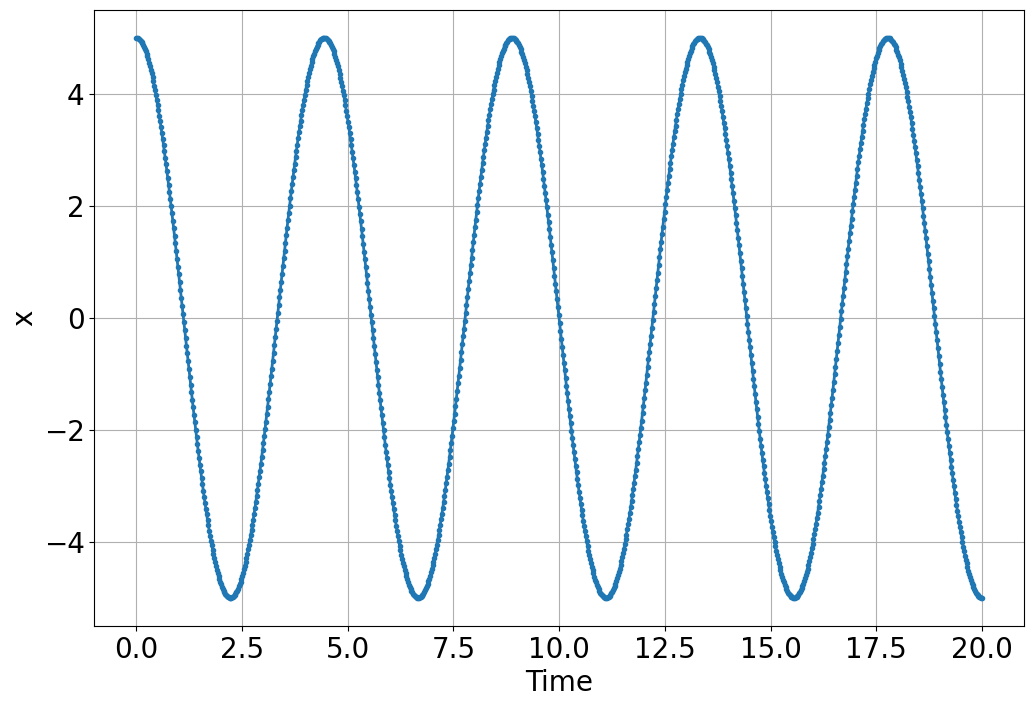

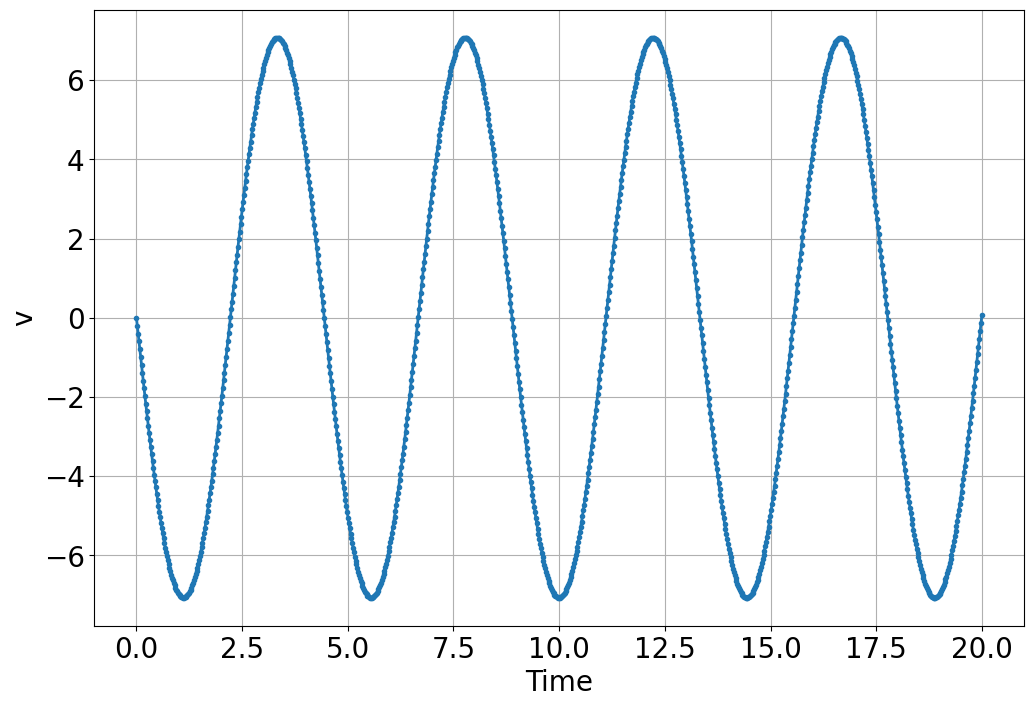

<Figure size 1200x800 with 0 Axes>

In [6]:
sim=Simulation()
sim.add(" x' = v   ",5,plot=True)
sim.add(" v' = -k*x/m",0,plot=True)
sim.params(k=2,m=1)
sim.run(20)

## parameter exploration

Text(0, 0.5, 'Velocity [m]')

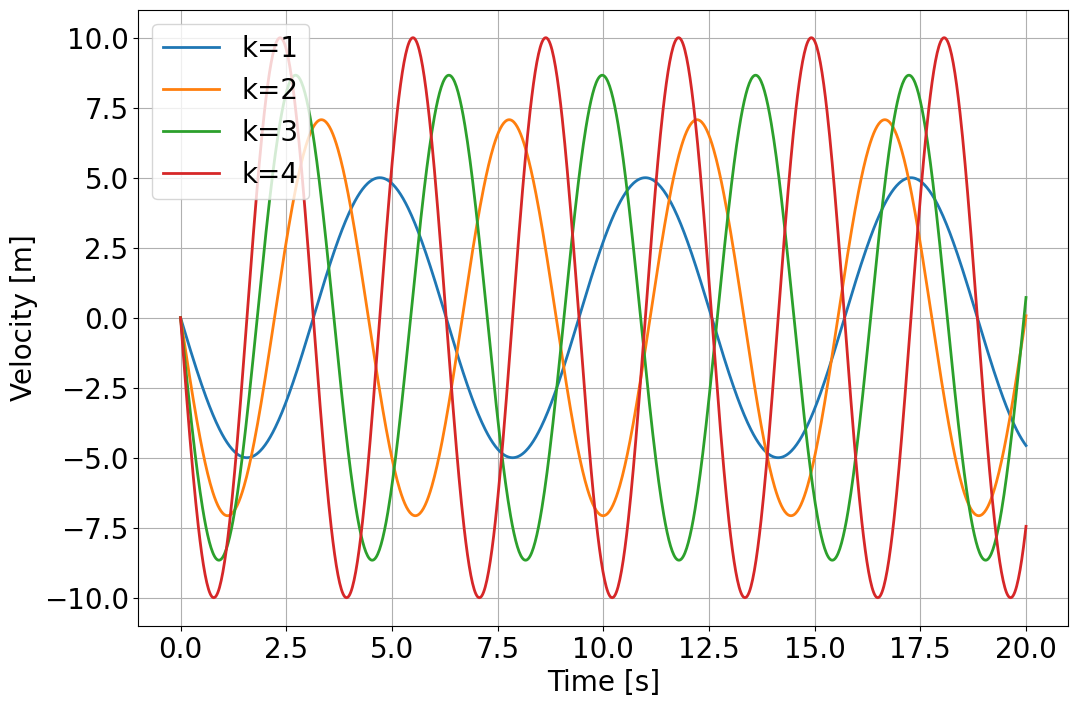

In [7]:
for k in [1,2,3,4]:
    sim=Simulation()
    sim.add(" x' = v   ",5)
    sim.add(" v' = -k*x/m",0)
    sim.params(k=k,m=1)
    sim.run(20)
    
    
    t=sim.t
    v=sim.v
    
    plot(t,v,label=f"k={k}")
    
legend()
xlabel('Time [s]')
ylabel('Velocity [m]')
    
    

Two effects can be seen:

1. the larger $k$ the larger the maximum $v$
2. the larger the $k$ the time between one maximum and the next is smaller (more bumps per second)

Can we quantify this?

Text(0, 0.5, 'Max $v$')

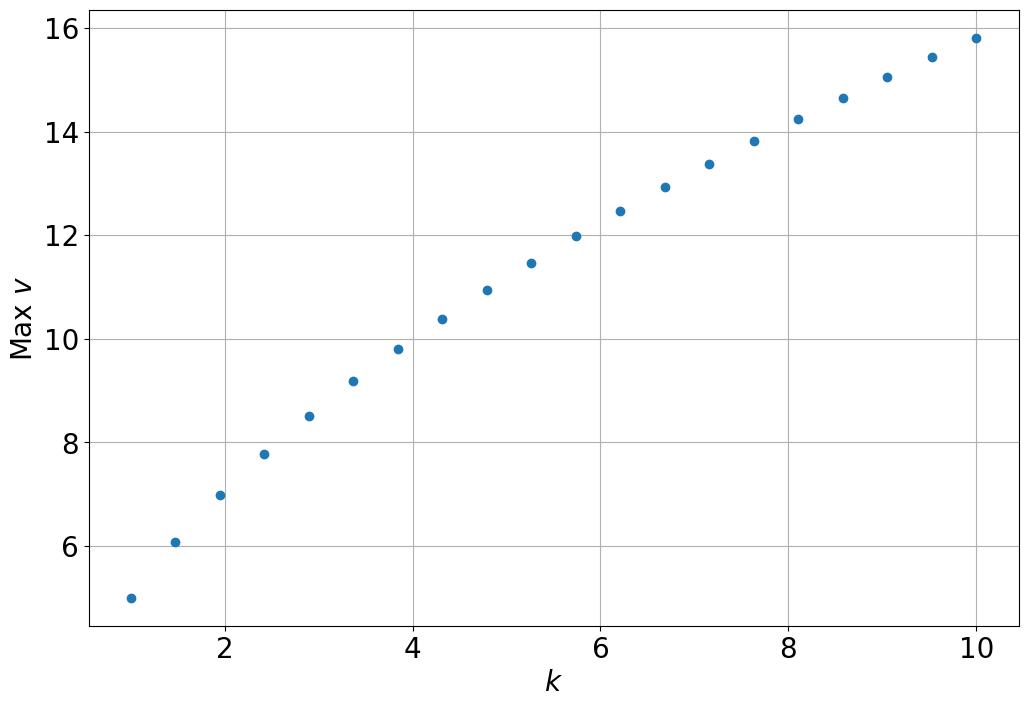

In [8]:
S=Storage()

for k in linspace(1,10,20):
    sim=Simulation()
    sim.add(" x' = v   ",5)
    sim.add(" v' = -k*x/m",0)
    sim.params(k=k,m=1)
    sim.run(20)
    
    
    t=sim.t
    v=sim.v
    
    S+=k,max(v)

k,mx=S.arrays() 
    
plot(k,mx,'o')
xlabel('$k$')
ylabel('Max $v$')
    
    

In [9]:
from scipy.signal import find_peaks

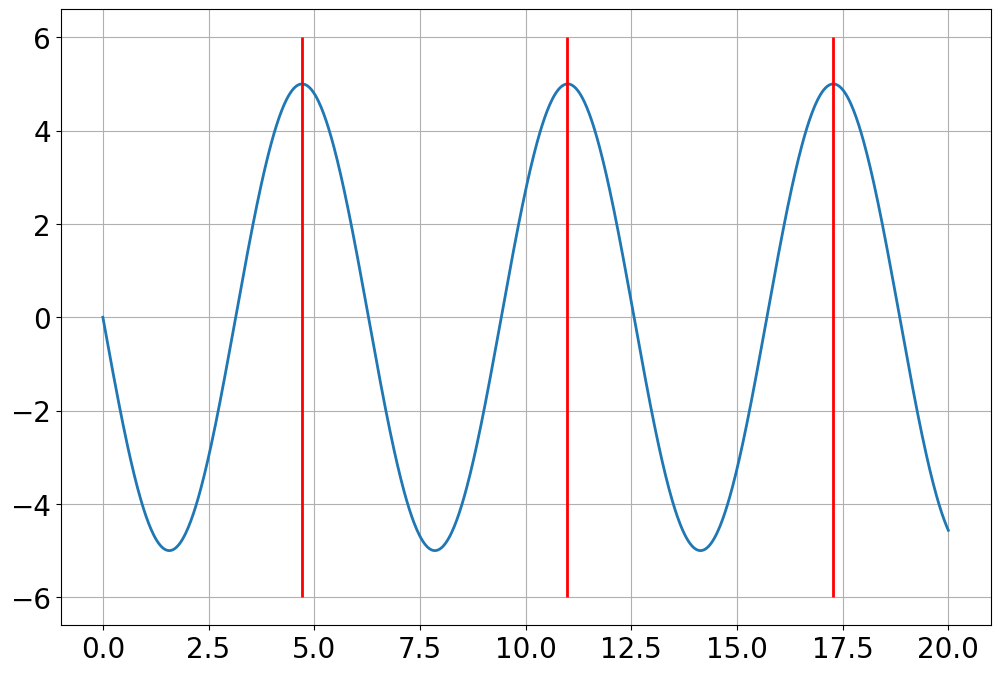

In [19]:
sim=Simulation()
sim.add(" x' = v   ",5)
sim.add(" v' = -k*x/m",0)
sim.params(k=1,m=1)
sim.run(20)


t=sim.t
v=sim.v

plot(t,v)

idx,_=result=find_peaks(v)
period=t[idx[1]]-t[idx[0]]

vlines([t[idx]],-6,6,color='red')

In [15]:
idx,_=result=find_peaks(v)
period=t[idx[1]]-t[idx[0]]
idx,period

(array([235, 549, 863]), 6.286286286286286)

Text(0, 0.5, 'period of oscillations')

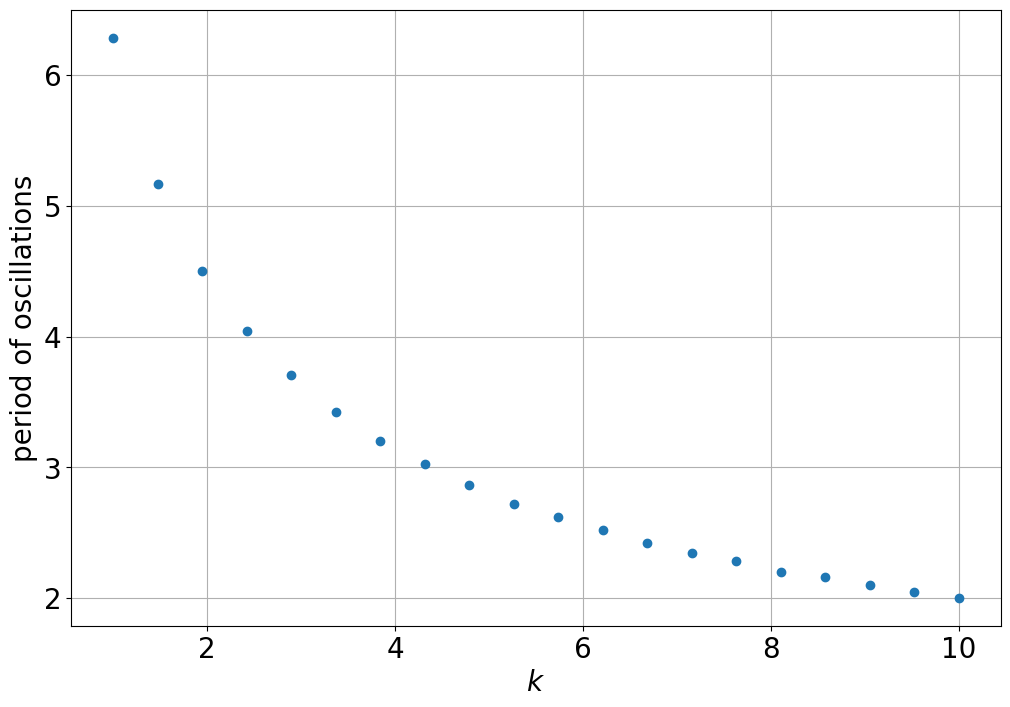

In [20]:
S=Storage()

for k in linspace(1,10,20):
    sim=Simulation()
    sim.add(" x' = v   ",5)
    sim.add(" v' = -k*x/m",0)
    sim.params(k=k,m=1)
    sim.run(20)
    
    
    t=sim.t
    v=sim.v
    
    idx,_=result=find_peaks(v)
    period=t[idx[1]]-t[idx[0]]    
    S+=k,period

k,period=S.arrays() 
    
plot(k,period,'o')
xlabel('$k$')
ylabel('period of oscillations')
    
    